<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Straitforward" data-toc-modified-id="Straitforward-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Straitforward</a></span></li><li><span><a href="#Siamese-classifier" data-toc-modified-id="Siamese-classifier-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Siamese classifier</a></span></li></ul></div>

In [1]:
import keras
from keras.applications import VGG16
from keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split

import os
import cv2
import os.path as osp
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

/scratch/home/aelphy/py27/local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import sys

sys.path.append('..')

%load_ext autoreload
%autoreload 2

In [33]:
DATA_FOLDER = "../data/monkey_spicies/"
dataset = {}

for mode in ['training', 'validation']:
    for cat in os.listdir(osp.join(DATA_FOLDER, mode)):
        if cat not in dataset:
            dataset[cat] = []
        
        for fname in os.listdir(osp.join(DATA_FOLDER, mode, cat)):
            dataset[cat].append(cv2.resize(cv2.imread(osp.join(DATA_FOLDER, mode, cat, fname)), (224, 224)))

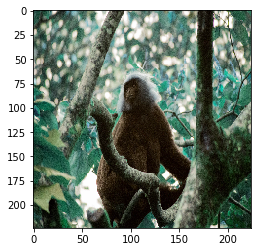

In [23]:
plt.imshow(dataset.values()[1][6])

In [36]:
len(dataset['n4'])

131

In [37]:
monkey1_train, monkey1_val, monkey2_train, monkey2_val = train_test_split(np.asarray(dataset['n0']), np.asarray(np.asarray(dataset['n4'])), test_size=0.7)

In [38]:
monkey1_train.shape

(39, 224, 224, 3)

# Straitforward

In [39]:
model = VGG16(include_top=False, weights=None, input_shape=(224, 224, 3))
model.load_weights('../weights/vgg16_weights_tf_dim_ordering_tf_kernels.h5', by_name=True)
model.trainable = True

In [40]:
predictor = Flatten()(model.output)
predictor = Dense(1024, activation='elu')(predictor)
predictor = Dense(512, activation='elu')(predictor)
predictor = Dense(1, activation='sigmoid')(predictor)

predictor = keras.Model([model.input], [predictor])
predictor.compile(
    loss='binary_crossentropy',
    optimizer=keras.optimizers.SGD(lr=1e-4, momentum=0.9),
    metrics=['accuracy']
)

In [42]:
X_train = np.vstack([monkey1_train, monkey2_train])
idxs = np.arange(len(X_train))
labels = np.hstack([np.ones(len(monkey1_train)), np.zeros(len(monkey2_train))])
BATCH_SIZE = 32
NUM_EPOCHS = 1000

predictor.fit(
    X_train[idxs], labels[idxs],
    batch_size=BATCH_SIZE, epochs=NUM_EPOCHS,
    validation_data=(np.vstack([monkey1_val, monkey2_val]), np.hstack([np.ones(len(monkey1_val)), np.zeros(len(monkey2_val))])))

Train on 78 samples, validate on 184 samples
Epoch 1/1000
78/78 [==============================] - 5s 59ms/step - loss: 3.3836 - acc: 0.6026 - val_loss: 0.7738 - val_acc: 0.8913
Epoch 2/1000
78/78 [==============================] - 1s 15ms/step - loss: 0.6111 - acc: 0.9231 - val_loss: 1.5426 - val_acc: 0.8370
Epoch 3/1000
78/78 [==============================] - 1s 15ms/step - loss: 0.4632 - acc: 0.9615 - val_loss: 0.9711 - val_acc: 0.8859
Epoch 4/1000
78/78 [==============================] - 1s 15ms/step - loss: 0.3235 - acc: 0.9744 - val_loss: 0.9159 - val_acc: 0.8587
Epoch 5/1000
78/78 [==============================] - 1s 15ms/step - loss: 0.3912 - acc: 0.9615 - val_loss: 1.3468 - val_acc: 0.8207
Epoch 6/1000
78/78 [==============================] - 1s 15ms/step - loss: 0.2143 - acc: 0.9487 - val_loss: 2.4919 - val_acc: 0.7663
Epoch 7/1000
78/78 [==============================] - 1s 15ms/step - loss: 0.3511 - acc: 0.9359 - val_loss: 0.7123 - val_acc: 0.8913
Epoch 8/1000
78/78 [====

78/78 [==============================] - 1s 16ms/step - loss: 1.2177e-06 - acc: 1.0000 - val_loss: 0.4510 - val_acc: 0.9293
Epoch 61/1000
78/78 [==============================] - 1s 15ms/step - loss: 1.1841e-06 - acc: 1.0000 - val_loss: 0.4510 - val_acc: 0.9293
Epoch 62/1000
78/78 [==============================] - 1s 15ms/step - loss: 1.1627e-06 - acc: 1.0000 - val_loss: 0.4509 - val_acc: 0.9293
Epoch 63/1000
78/78 [==============================] - 1s 16ms/step - loss: 1.1550e-06 - acc: 1.0000 - val_loss: 0.4508 - val_acc: 0.9293
Epoch 64/1000
78/78 [==============================] - 1s 16ms/step - loss: 1.1168e-06 - acc: 1.0000 - val_loss: 0.4508 - val_acc: 0.9293
Epoch 65/1000
78/78 [==============================] - 1s 15ms/step - loss: 1.0969e-06 - acc: 1.0000 - val_loss: 0.4507 - val_acc: 0.9293
Epoch 66/1000
78/78 [==============================] - 1s 15ms/step - loss: 1.0878e-06 - acc: 1.0000 - val_loss: 0.4506 - val_acc: 0.9293
Epoch 67/1000


KeyboardInterrupt: 

# Siamese classifier

In [ ]:
import models.siamese

model = models.siamese.build(
    (256, 256, 3), 1024, 128, 'vgg16'
)

# NOTE: doesn't work with keras
# model.compile(
#     loss=lambda y, x: tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=x)),
#     optimizer=keras.optimizers.RMSprop(1e-5),
#     metrics=[]
# )

labels = tf.placeholder(tf.float32, name='labels')

loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=labels, logits=model.output))

global_step = tf.Variable(0, trainable=False)
train_step = tf.train.RMSPropOptimizer(1e-5).minimize(loss, global_step=global_step)
tf.add_to_collection('train_step', train_step)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

input_1 = model.input[0]
input_2 = model.input[1]